In [2]:
import os
import pickle
import importlib
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from skimage import exposure
from keras.models import Model
from keras.models import load_model
from keras.utils import to_categorical
os.chdir('C:/Users/Pierre Lavigne/Dropbox/Etude de Cas M2/Scripts') #Select your working directory
cwd = os.getcwd()
Functions=importlib.import_module("Functions")
Functions=importlib.reload(Functions)
#%%


model = load_model('second_model.hd5')

model.summary()
#%%



Using TensorFlow backend.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 30, 30, 16)        448       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 28, 28, 32)        4640      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 6272)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               802944    
_________________________________________________________________
dropout_4 (Dropout)          (None, 128)               0         
__________

In [79]:
with open("C:/Users/Pierre Lavigne/Desktop/noisy_sign.pickle", mode='rb') as f:
        dataset = pickle.load(f)
images = dataset['images']
labels = dataset['labels']

In [83]:
def reshape_data(im):
    images = []
    for j in range(len(im)):
        print(j)
        images.append([])
        for i in im[j] :
            images[j].append(i.reshape((1,32,32,3)))
    return images

images = reshape_data(images)

0
1
2
3
4


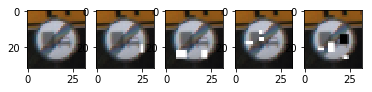

In [103]:
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(images[i][13000][0])
plt.show()

In [111]:
model.predict(images[0][0])[0].argmax()

5

In [87]:
from keras.utils import to_categorical
target_test=to_categorical(labels[0])

In [66]:
res = []
for j in range(5):
    print(j)
    n = 0
    for i in range(len(images[j])):
        if (model.predict(images[j][i])[0].argmax() == labels[j][i]):
            n += 1
    res.append(n/len(images[j]))

0
1
2
3
4


In [67]:
res

[0.0, 0.0, 0.0, 0.0, 0.0]